In [1]:
import requests

In [2]:
page = requests.get("https://www.eluniversal.com/")

In [3]:
page

<Response [200]>

b'<!DOCTYPE html>\n<html class="no-js" lang="es">\n<head>\n    <title>EL UNIVERSAL</title>\n    <meta charset="utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=no" />\n    \n    <script>console.log(\'--> srvapache002.eluniversal.com/01-HOME/V01-D13B15v05/7834\')</script>\t\n\t    <script type="application/ld+json">\n        {\n            "@context": "http://schema.org",\n            "@type": "Organization",\n            \t\t\t\t"url": "http://www.eluniversal.com",\n\t\t\t\t\t\t            \t"name": "El UNIVERSAL",\n            \t\t\t\t\t\t\t"description": "Encuentra noticias de Venezuela y el mundo. Avances informativos de &uacute;ltimo minuto sobre: econom&iacute;a, deportes, entretenimiento, sucesos, pol&iacute;tica y m&aacute;s",\n\t\t\t            "logo": "http://www.eluniversal.com/img/default.png",\n            "contactPoint": [{\n                "@type": "ContactPoint",\n                "telephone": "+58-212-505-22-11",\n         
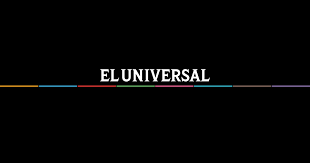
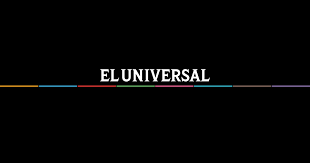

In [4]:
page.content

In [5]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

<!DOCTYPE html>
<html class="no-js" lang="es">
 <head>
  <title>
   EL UNIVERSAL
  </title>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, user-scalable=no" name="viewport"/>
  <script>
   console.log('--> srvapache002.eluniversal.com/01-HOME/V01-D13B15v05/7834')
  </script>
  <script type="application/ld+json">
   {
            "@context": "http://schema.org",
            "@type": "Organization",
            				"url": "http://www.eluniversal.com",
						            	"name": "El UNIVERSAL",
            							"description": "Encuentra noticias de Venezuela y el mundo. Avances informativos de &uacute;ltimo minuto sobre: econom&iacute;a, deportes, entretenimiento, sucesos, pol&iacute;tica y m&aacute;s",
			            "logo": "http://www.eluniversal.com/img/default.png",
            "contactPoint": [{
                "@type": "ContactPoint",
                "telephone": "+58-212-505-22-11",
                "contactType": "customer service",
             
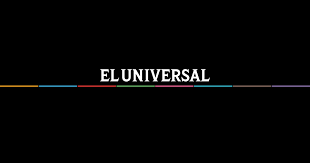
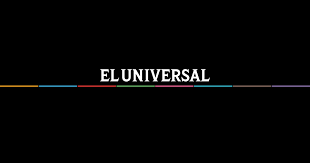

In [6]:
print(soup.prettify())

In [8]:
panel= soup.find(class_="columns small-12 medium-8-landscape large-9")

In [9]:
forecast_items = panel(class_="txt")

In [10]:
tonight = forecast_items[0]

In [11]:
print(tonight.prettify())

<div class="txt">
 <h3 class="title">
  <a href="http://www.eluniversal.com/caracas/70900/se-escuchan-cacerolazos-en-gran-parte-de-la-ciudad-capital" title="">
  </a>
 </h3>
 <h3 class="title">
  <a href="http://www.eluniversal.com/caracas/70900/se-escuchan-cacerolazos-en-gran-parte-de-la-ciudad-capital" title="">
   Se escucharon cacerolazos en gran parte de la ciudad capital
  </a>
 </h3>
 <span class="autorname">
  VALENTÍN ROMERO MARTÍNEZ
 </span>
 <p class="epigraph">
  <span class="c1">
  </span>
  <span class="c1">
   19/05/2020 09:34 pm
  </span>
  <!-- <a href="#" title="" class="c2"> </a> -->
 </p>
 <p class="newtext">
  Acompañados de consignas como "queremos DirecTV" y "fuera Maduro" los caraqueños protestaron desde Caricuao hasta Petare, para demostrar su descontento con el Gobierno nacional
 </p>
</div>



In [12]:
period = tonight.find(class_="newtext").get_text()  

In [13]:
print(period)

Acompañados de consignas como "queremos DirecTV" y "fuera Maduro" los caraqueños protestaron desde Caricuao hasta Petare, para demostrar su descontento con el Gobierno nacional


In [14]:
period_tags = panel.select(".txt .newtext")

In [15]:
periods = [pt.get_text() for pt in period_tags]

In [16]:
periods 

['Acompañados de consignas como "queremos DirecTV" y "fuera Maduro" los caraqueños protestaron desde Caricuao hasta Petare, para demostrar su descontento con el Gobierno nacional',
 'El último balance también revela que fueron confirmados otros 17.408 casos en un día, lo cual deja la cifra total de contagios en 271.628 el mayor número en Latinoamérica',
 'Vecinos de La Florida, La Campiña, El Recreo y La Florida informaron por Twitter que no tienen servicio eléctrico desde aproximadamente las ocho de la noche',
 'El hombre detenido este 19 de mayo fue identificado como Víctor Alexis Vásquez Contreras, quien según los cuerpos de seguridad fue quien facilitó un vehículo para el "ataque frustrado" ',
 'Durante la sesión de este 19 de mayo, parlamentarios opositores alegaron que el Gobierno de Nicolás Maduro viola los derechos humanos de los niños, niñas y adolescentes ',
 'Se desconoce si la actividad guarda relación con los ejercicios militares "Escudo Bolivariano 2020" que realiza la FA

In [17]:
import pandas as pd

In [18]:
weather = pd.DataFrame({
    "noticias": periods,
   
})
weather

,noticias
0,"Acompañados de consignas como ""queremos DirecT..."
1,El último balance también revela que fueron co...
2,"Vecinos de La Florida, La Campiña, El Recreo y..."
3,El hombre detenido este 19 de mayo fue identif...
4,"Durante la sesión de este 19 de mayo, parlamen..."
5,Se desconoce si la actividad guarda relación c...
6,\nEl Promedio Industrial Dow Jones registró un...
7,Oficialistas insisten en que cierre de operaci...
8,El líder opositor agradeció a los diputados op...
9,El técnico aseguró que las refinerías están “p...


In [19]:
weather.to_csv(r'C:\Users\Admin\Desktop\file3.csv', index=False)